# Dataset D1 - WGS human

## Importing libraries

In [50]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

## Data reading and formating - WGS human

In [51]:
data = pd.read_csv('../summary_data/D1_WGS_human_summary.csv')
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']

## Data reading and formating - WGS human complexity


In [52]:
data_comp = pd.read_csv('../summary_data/D1_WGS_human_complexity_summary.csv')
data_comp["Trim Effeciency"] = data_comp["Base - TP TRIM"]/(data_comp["Base - TP TRIM"] + data_comp["Base - FP TRIM"])
data_comp['total_corrections'] = data_comp['Base - TP']+ data_comp['Base - FP']

## Data reading - CPU and RAM for WGS human Coverage 8x

In [53]:
data_cpu_ram = pd.read_csv('../summary_data/D1_WGS_human_cpu_memory.csv')
data_cpu_ram = data_cpu_ram.groupby(['Tool'],as_index=False).mean()
data_cpu_ram = data_cpu_ram.fillna(0)

## Defining color dictionary

In [54]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best gain for each tool

In [55]:
data_best = data.loc[data.groupby(["Tool","Coverage"])["Base Gain"].idxmax()]  
data_comp_best = data_comp.loc[data_comp.groupby(["Tool","Coverage","Complexity"])["Base Gain"].idxmax()]  
data_best["Coverage"] = data_best["Coverage"].astype(int)
data_best = data_best.fillna(0)

<br>
<br>

## Figure 2a
Heatmap depicting the gain across various coverage settings. 
<br> Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage. 
<br> For each tool, the best k-mer size was selected.

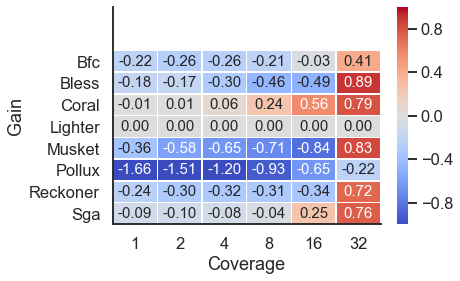

In [56]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Gain')\
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-1, 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Gain')
g.set_ylim(0, 10)
g=sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2a_heatmap_gain.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2a_heatmap_gain.pdf",bbox_inches="tight")

<br>
<br>

## Figure 2b
Heatmap depicting the precision across various coverage settings.
<br> Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br> For each tool, the best k-mer size was selected.

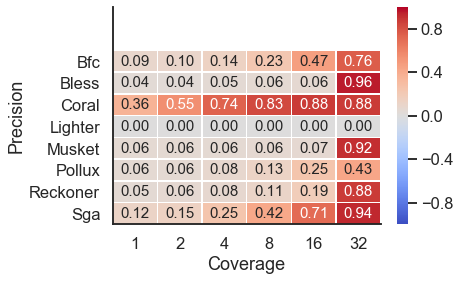

In [57]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Precision')\
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-1, 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Precision')
g.set_ylim(0, 10)
g=sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2b_heatmap_precision.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2b_heatmap_precision.pdf",bbox_inches="tight")

<br>
<br>

## Figure 2c
Heatmap depicting the sensitivity across various coverage settings. 
<br> Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br> For each tool, the best k-mer size was selected.

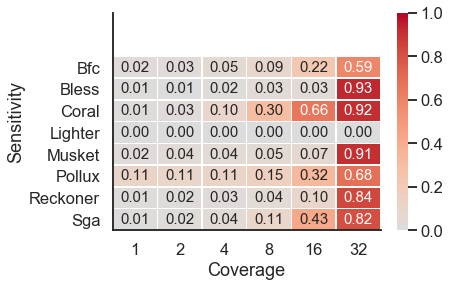

In [58]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Sensitivity')\
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f", 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Sensitivity')
g.set_ylim(0, 10)
g=sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2c_heatmap_sensitivity.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/Fig2c_heatmap_sensitivity.pdf",bbox_inches="tight")

<br>
<br>

## Figure 2d
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis) for datasets with 32x coverage. 
<br> For each tool, the best k-mer size was selected.

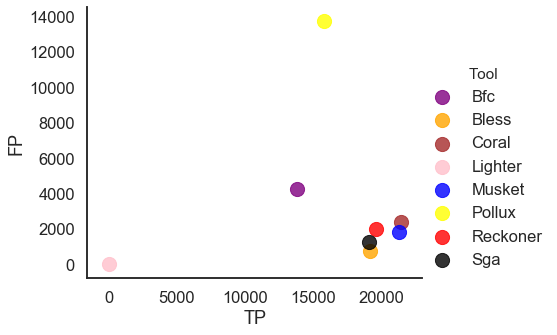

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base - TP', 
             y='Base - FP', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200})

g.set(xlabel='TP', ylabel='FP')
g=sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2d_TP_vs_FP.png")
plt.savefig("../figures/D1_WGS_human/Fig2d_TP_vs_FP.pdf")

<br>
<br>

## Figure 2e
Scatter plot depicting the number of FP corrections (x-axis) and FN corrections (y-axis) for datasets with 32x coverage. 
<br> For each tool, the best k-mer size was selected.

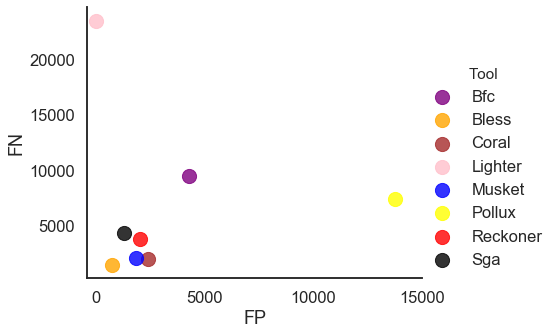

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base - FP', 
             y='Base - FN', 
             hue='Tool', 
             palette=color_dict,
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200})

g.set(xlabel='FP', ylabel='FN')
plt.xlim(-400, 15001)
g=sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2e_FP_vs_FN.png")
plt.savefig("../figures/D1_WGS_human/Fig2e_FP_vs_FN.pdf")

<br>
<br>

## Figure 2f
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) for datasets with 32x coverage. 
<br> For each tool, the best k-mer size was selected.


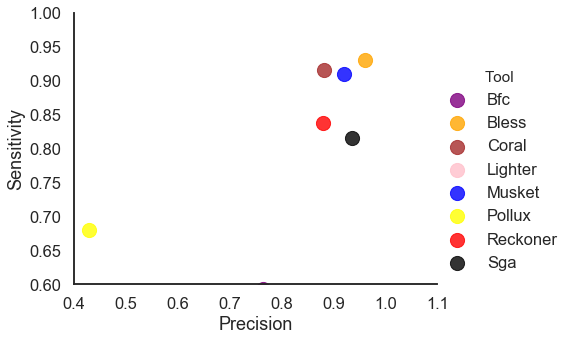

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200})

g.set(xlabel='Precision', ylabel='Sensitivity')
plt.ylim(0.6, 1.0)
plt.xlim(0.4, 1.1)
g=sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig2f_Precision_vs_Sensitivity.png")
plt.savefig("../figures/D1_WGS_human/Fig2f_Precision_vs_Sensitivity.pdf")


<br>
<br>

## Figure S4a
The effect of the kmer size on the accuracy of the total corrections made across various coverages settings for WGS data with coverage of 1x.
<br> 

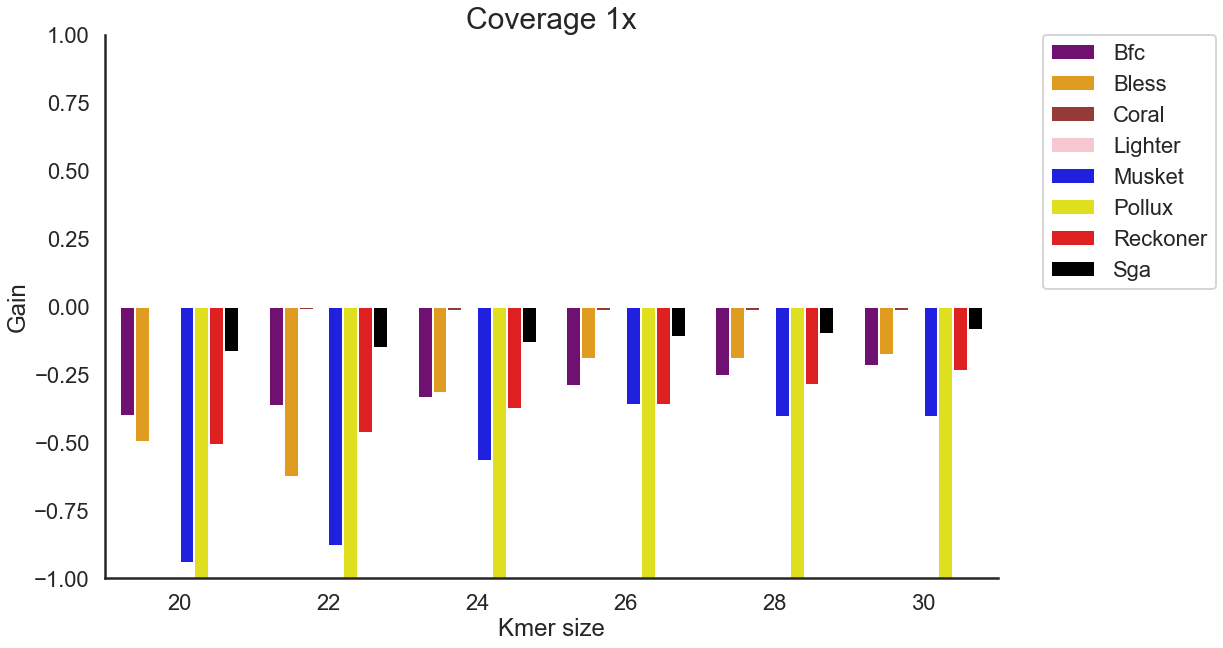

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] == 1) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)



g.set(xlabel='Kmer size', ylabel='Gain')
plt.title("Coverage 1x", fontsize=30)
plt.ylim(-1, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS4a_WGS_human_kmers_gain_cov1.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4a_WGS_human_kmers_gain_cov1.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4b
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 2x.

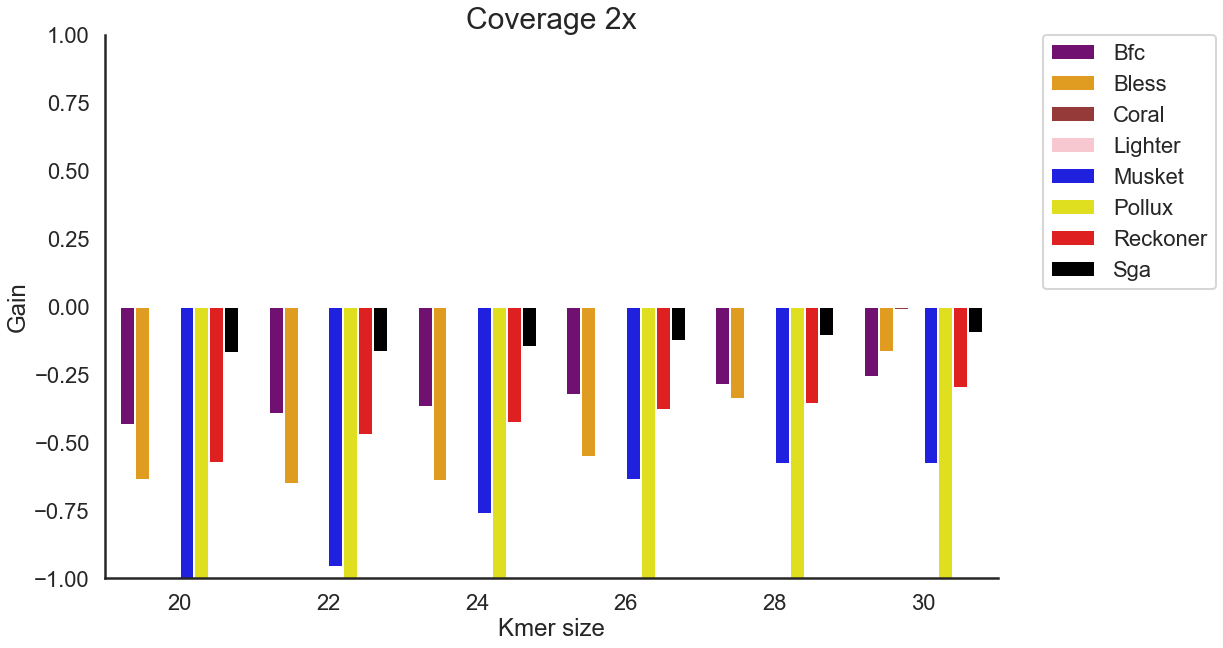

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] == 2) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)



g.set(xlabel='Kmer size', ylabel='Gain')
plt.title("Coverage 2x", fontsize=30)
plt.ylim(-1, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS4b_WGS_human_kmers_gain_cov2.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4b_WGS_human_kmers_gain_cov2.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4c
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 4x.

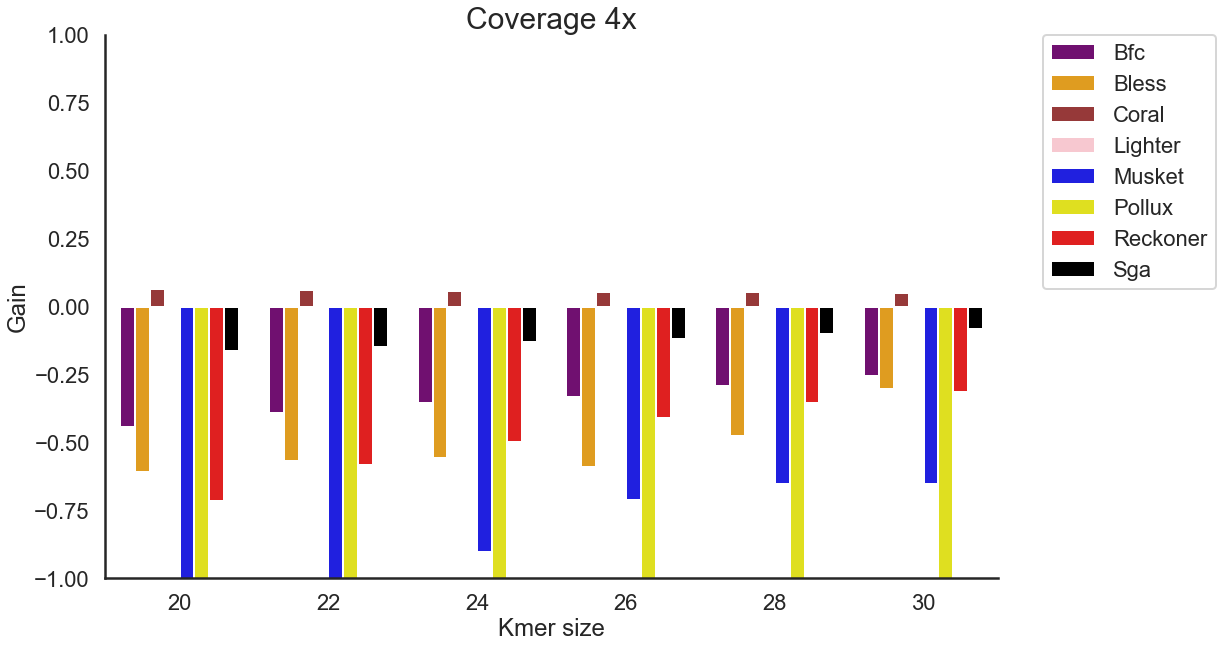

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==4) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)



g.set(xlabel='Kmer size', ylabel='Gain')
plt.title("Coverage 4x", fontsize=30)
plt.ylim(-1, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS4c_WGS_human_kmers_gain_cov4.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4c_WGS_human_kmers_gain_cov4.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4d
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 8x.

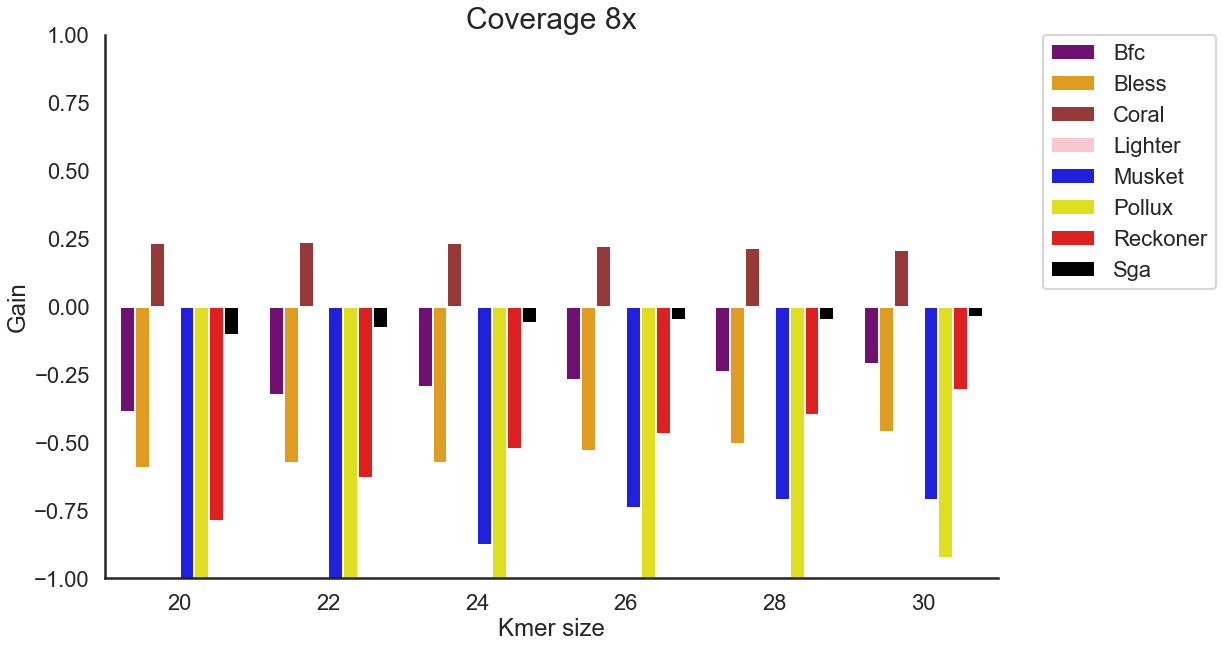

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==8)  & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)



g.set(xlabel='Kmer size', ylabel='Gain')
plt.title("Coverage 8x", fontsize=30)
plt.ylim(-1, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS4d_WGS_human_kmers_gain_cov8.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4d_WGS_human_kmers_gain_cov8.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4e
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 16x.

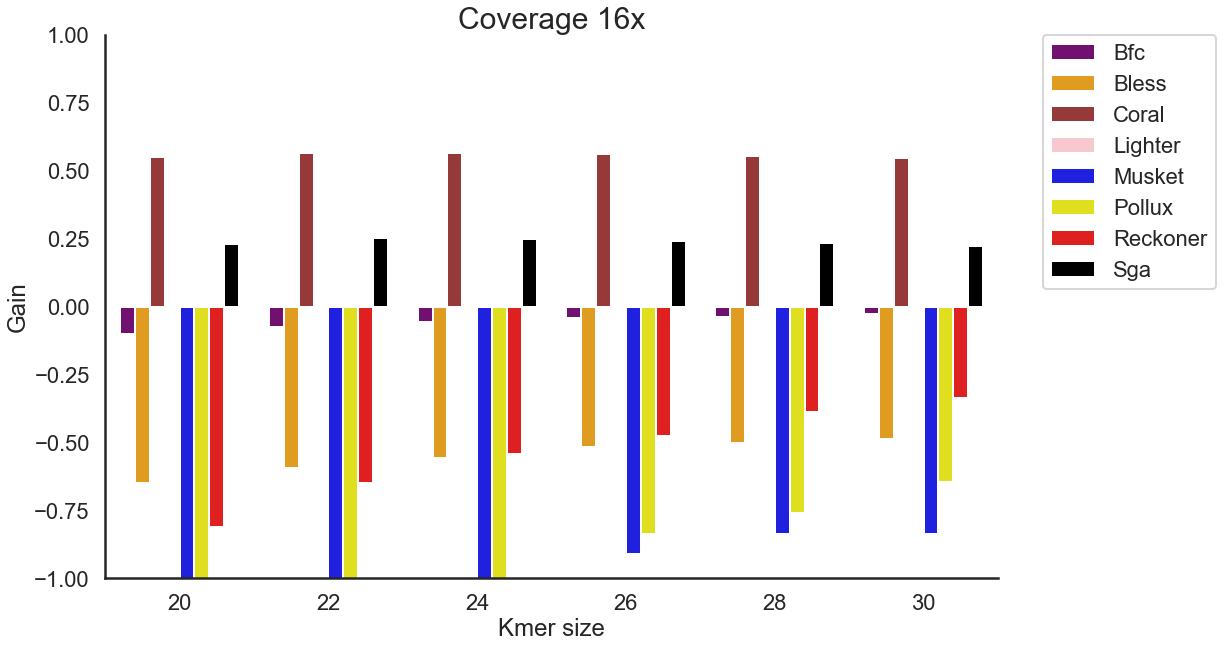

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==16) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)



g.set(xlabel='Kmer size', ylabel='Gain')
plt.title("Coverage 16x", fontsize=30)
plt.ylim(-1, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS4e_WGS_human_kmers_gain_cov16.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4e_WGS_human_kmers_gain_cov16.pdf", bbox_inches='tight')

<br>
<br>

## Figure S4f
The effect of the kmer size on the accuracy of the total corrections for WGS data with coverage of 32x.

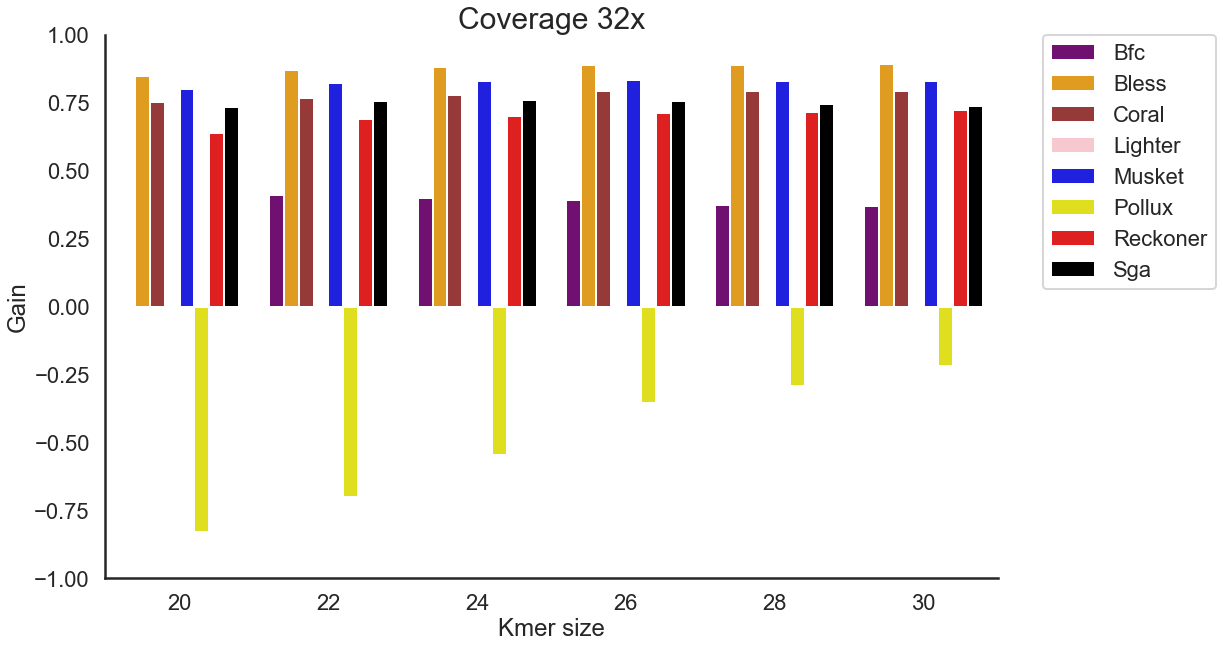

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot( data = data[(data['Coverage'] ==32) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)



g.set(xlabel='Kmer size', ylabel='Gain')
plt.title("Coverage 32x", fontsize=30)
plt.ylim(-1, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS4f_WGS_human_kmers_gain_cov32.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS4f_WGS_human_kmers_gain_cov32.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5a
The effect of coverage on the total number of corrections WGS human data with coverage of 1x.

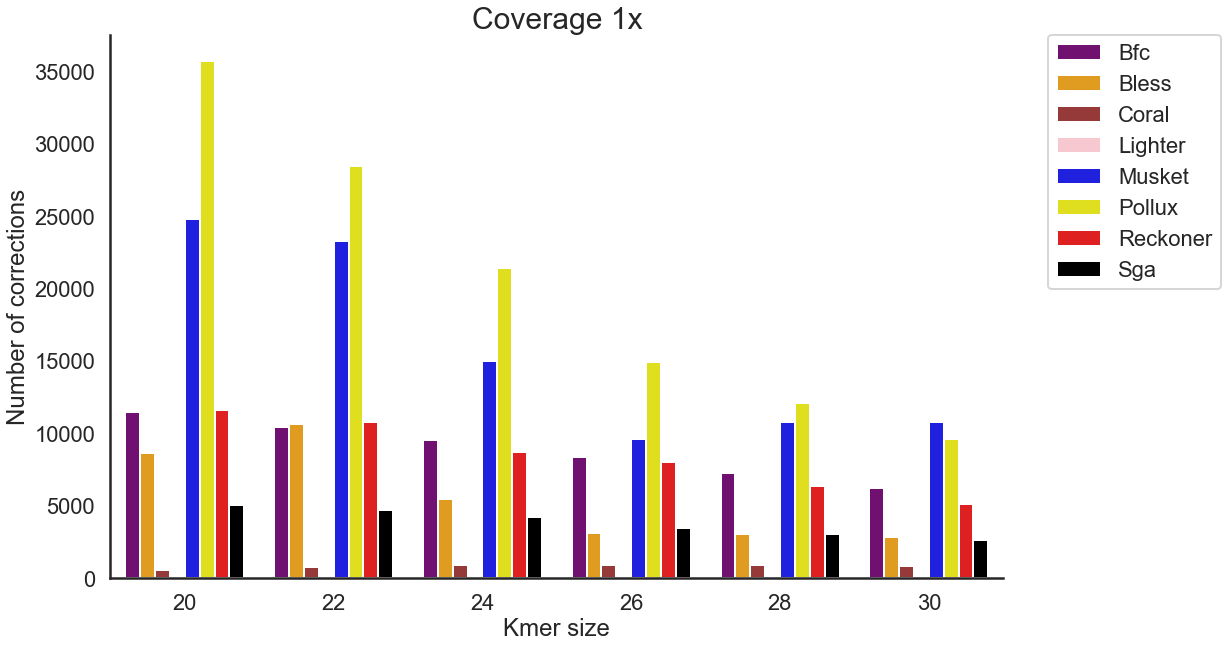

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==1) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Kmer size', ylabel='Number of corrections')
sns.despine()

plt.title("Coverage 1x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.savefig("../figures/D1_WGS_human/FigS5a_WGS_human_kmers_total_corrections_cov1.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5a_WGS_human_kmers_total_corrections_cov1.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5b
The effect of coverage on the total number of corrections WGS human data with coverage of 2x.

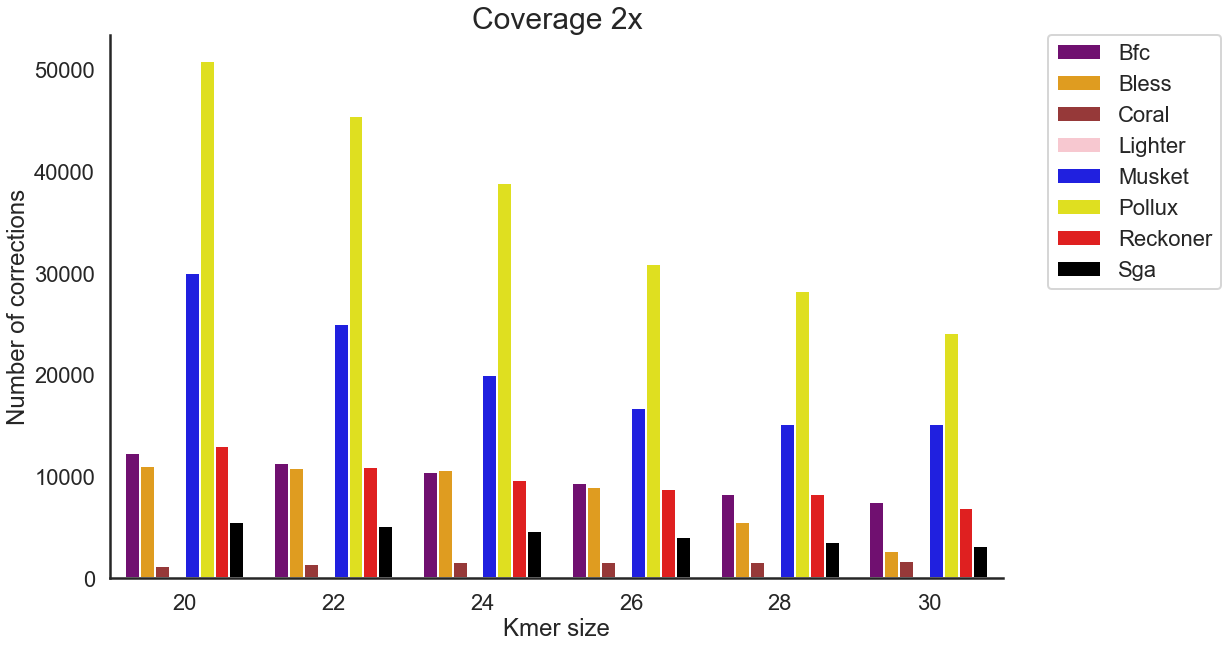

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==2) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Kmer size', ylabel='Number of corrections')
sns.despine()

plt.title("Coverage 2x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.savefig("../figures/D1_WGS_human/FigS5b_WGS_human_kmers_total_corrections_cov2.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5b_WGS_human_kmers_total_corrections_cov2.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5c
The effect of coverage on the total number of corrections WGS human data with coverage of 4x.

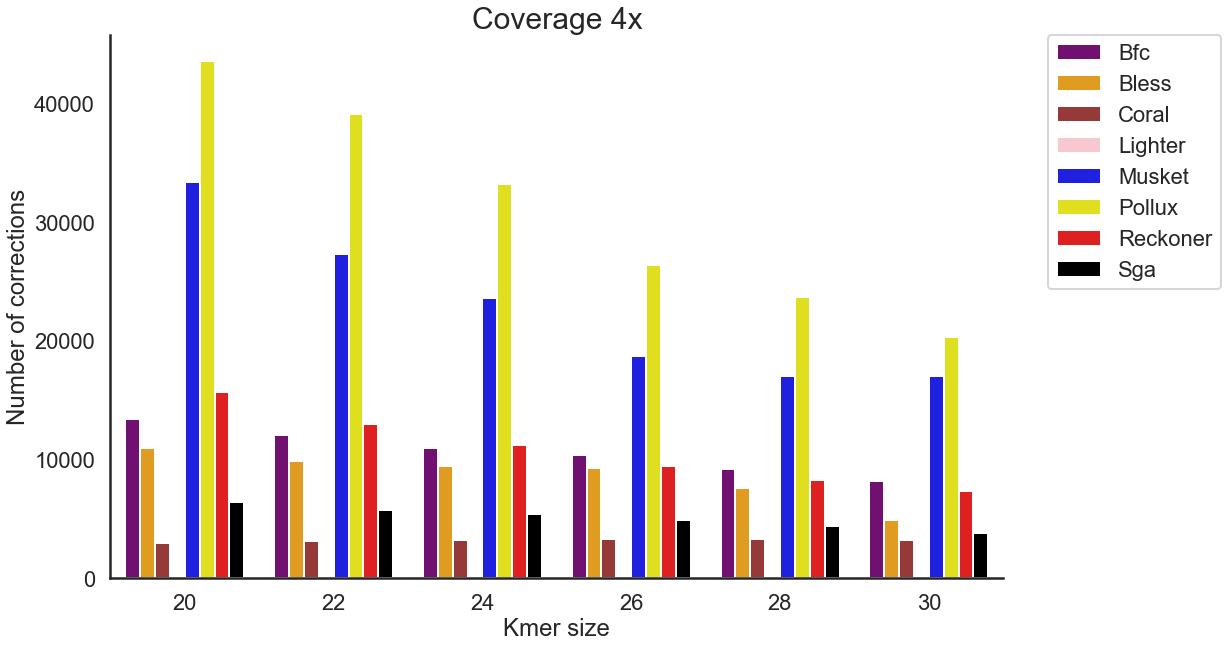

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==4) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Kmer size', ylabel='Number of corrections')
sns.despine()

plt.title("Coverage 4x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.savefig("../figures/D1_WGS_human/FigS5c_WGS_human_kmers_total_corrections_cov4.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5c_WGS_human_kmers_total_corrections_cov4.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5d
The effect of coverage on the total number of corrections WGS human data with coverage of 8x.

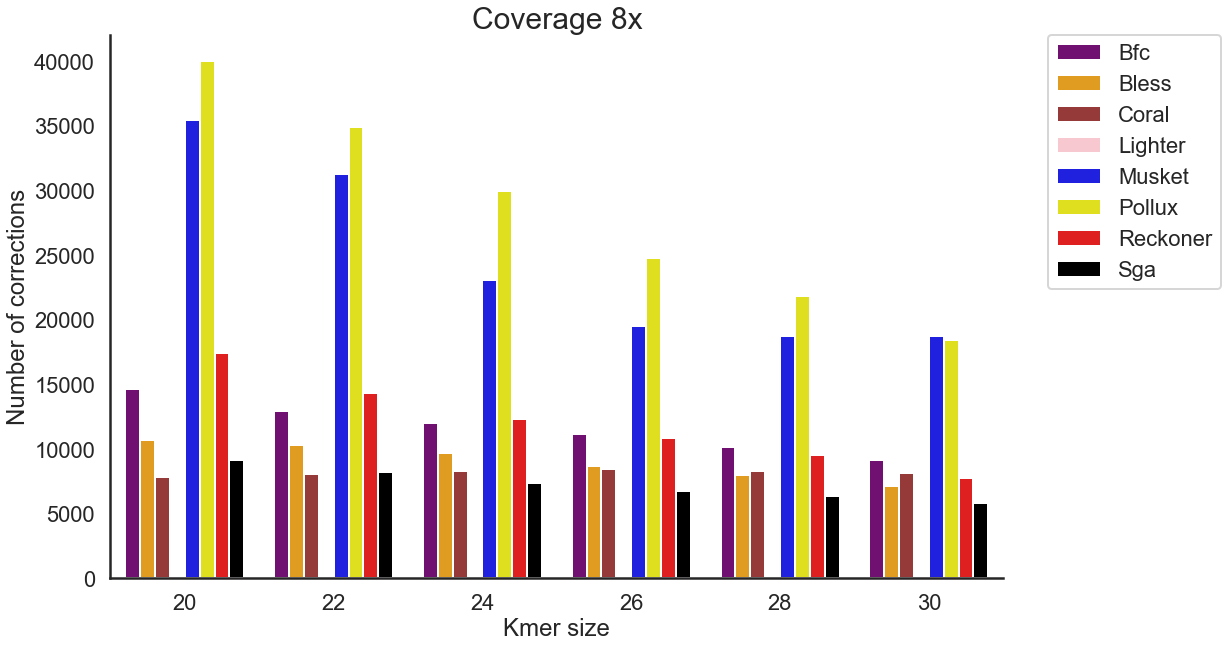

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==8) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Kmer size', ylabel='Number of corrections')
sns.despine()

plt.title("Coverage 8x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.savefig("../figures/D1_WGS_human/FigS5d_WGS_human_kmers_total_corrections_cov8.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5d_WGS_human_kmers_total_corrections_cov8.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5e
The effect of coverage on the total number of corrections WGS human data with coverage of 16x.

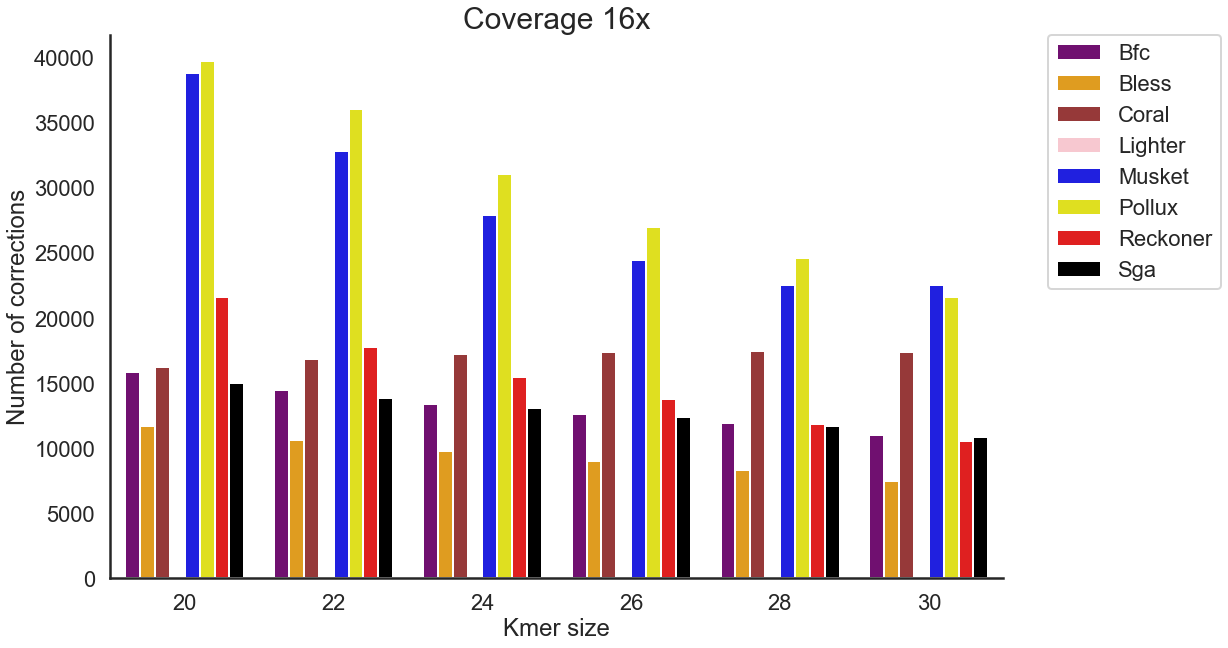

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==16) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Kmer size', ylabel='Number of corrections')
sns.despine()

plt.title("Coverage 16x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS5e_WGS_human_kmers_total_corrections_cov16.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5e_WGS_human_kmers_total_corrections_cov16.pdf", bbox_inches='tight')

<br>
<br>

## Figure S5f
The effect of coverage on the total number of corrections WGS human data with coverage of 32x.

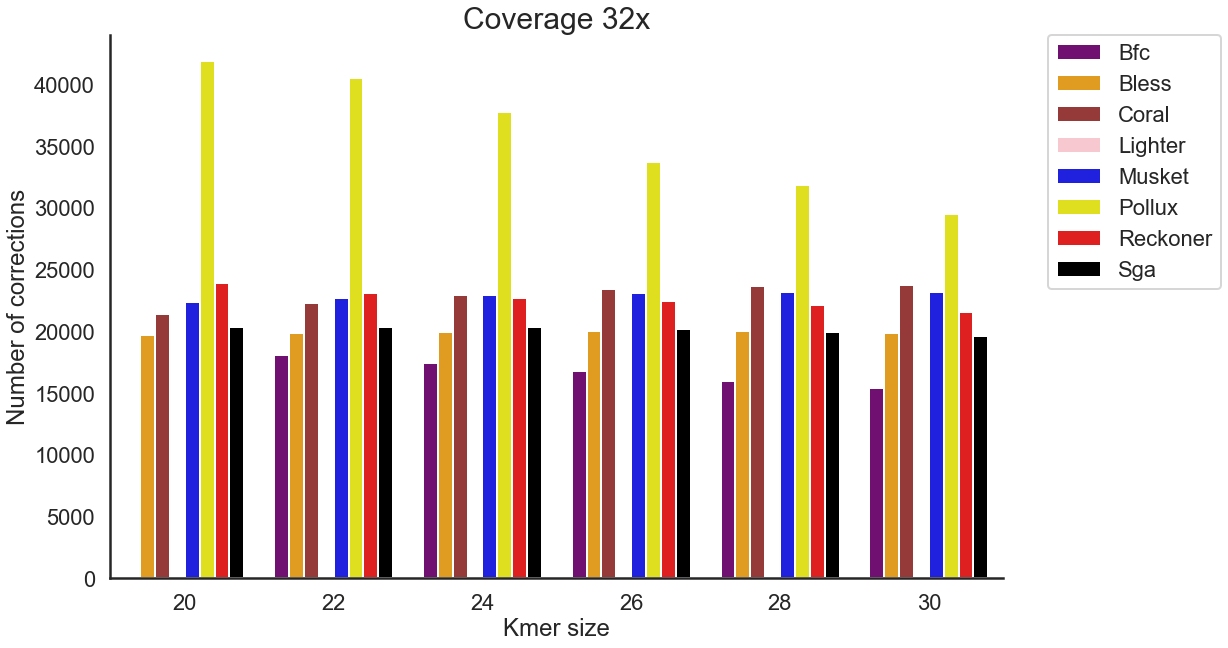

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="total_corrections",
              data = data[(data['Coverage'] ==32) & (data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Kmer size', ylabel='Number of corrections')
sns.despine()

plt.title("Coverage 32x", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS5f_WGS_human_kmers_total_corrections_cov32.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS5f_WGS_human_kmers_total_corrections_cov32.pdf", bbox_inches='tight')

<br>
<br>

## Figure S6a
The effect of coverage on the total number of corrections of the error correction tools across various coverages settings for WGS human dataset.
<br> For each tool, the best k-mer size was selected.

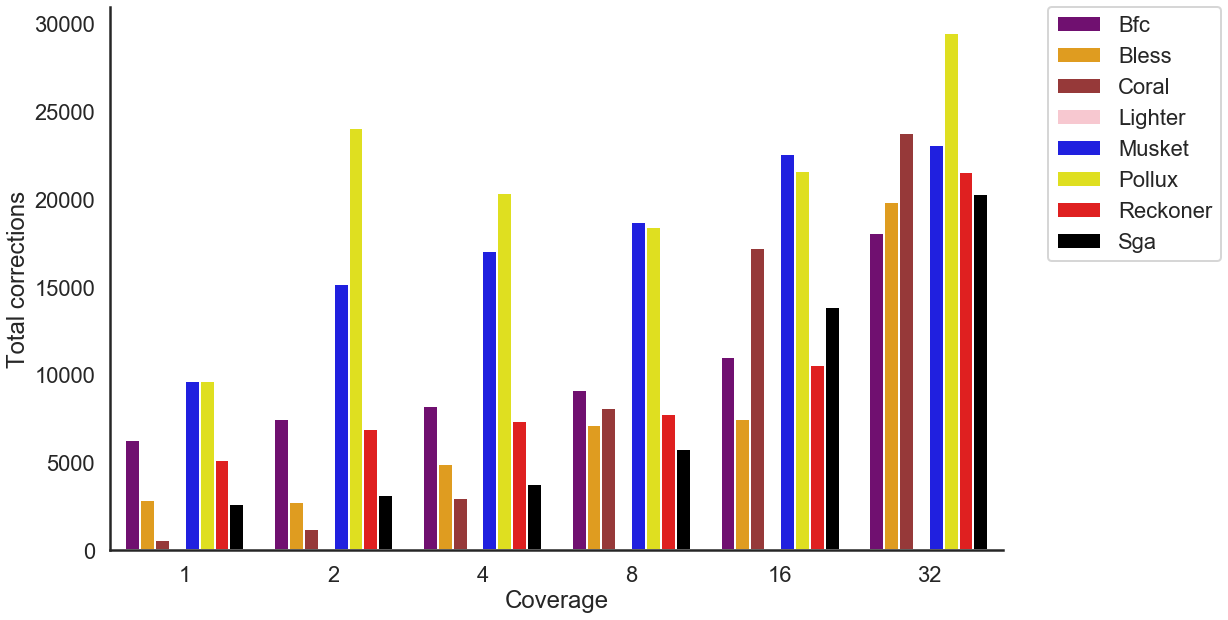

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Coverage", 
              y="total_corrections",
              data = data_best,
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Coverage', ylabel='Total corrections')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS6a_WGS_human_total_corrections_cov.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS6a_WGS_human_total_corrections_cov.pdf", bbox_inches='tight')

<br>
<br>

## Figure S6b
The effect of coverage on the total number of TP corrections of the error correction tools across various coverages settings for WGS human dataset.
<br> For each tool, the best k-mer size was selected.

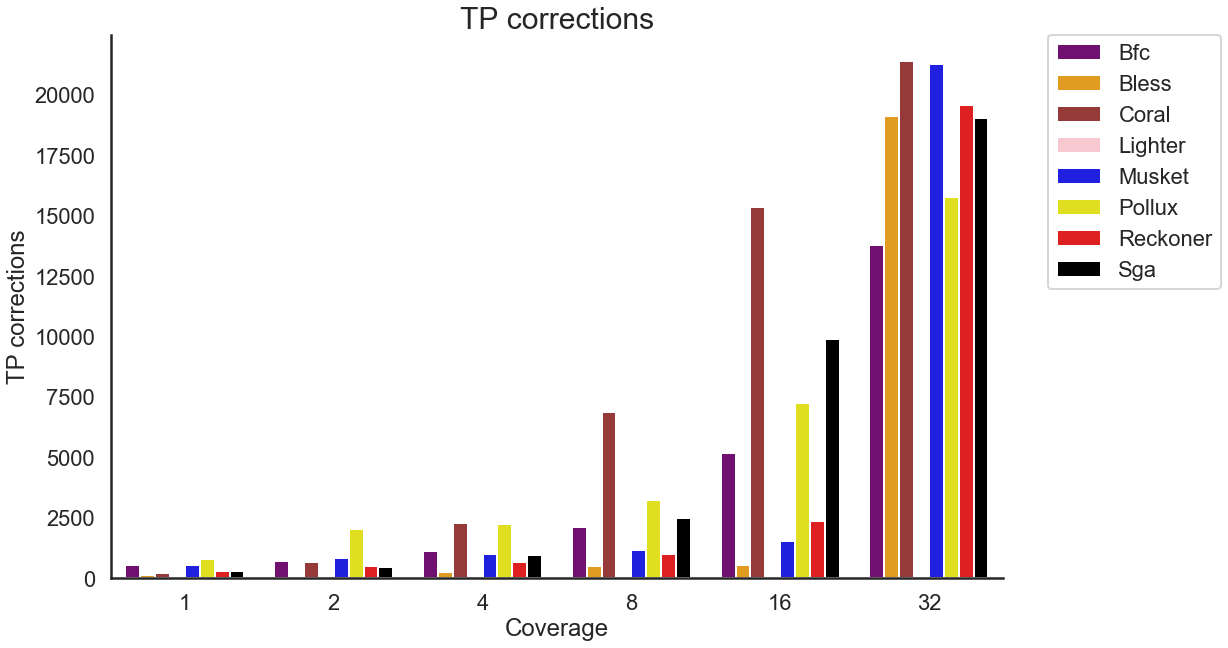

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Coverage", 
              y="Base - TP",
              data = data_best,
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Coverage', ylabel='TP corrections')
plt.title("TP corrections", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS6b_WGS_human_TP_corrections_cov.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS6b_WGS_human_TP_corrections_cov.pdf", bbox_inches='tight')

<br>
<br>

## Figure S6c
The effect of coverage on the total number of FP corrections of the error correction tools across various coverages settings for WGS human dataset. 
<br> For each tool, the best k-mer size was selected.

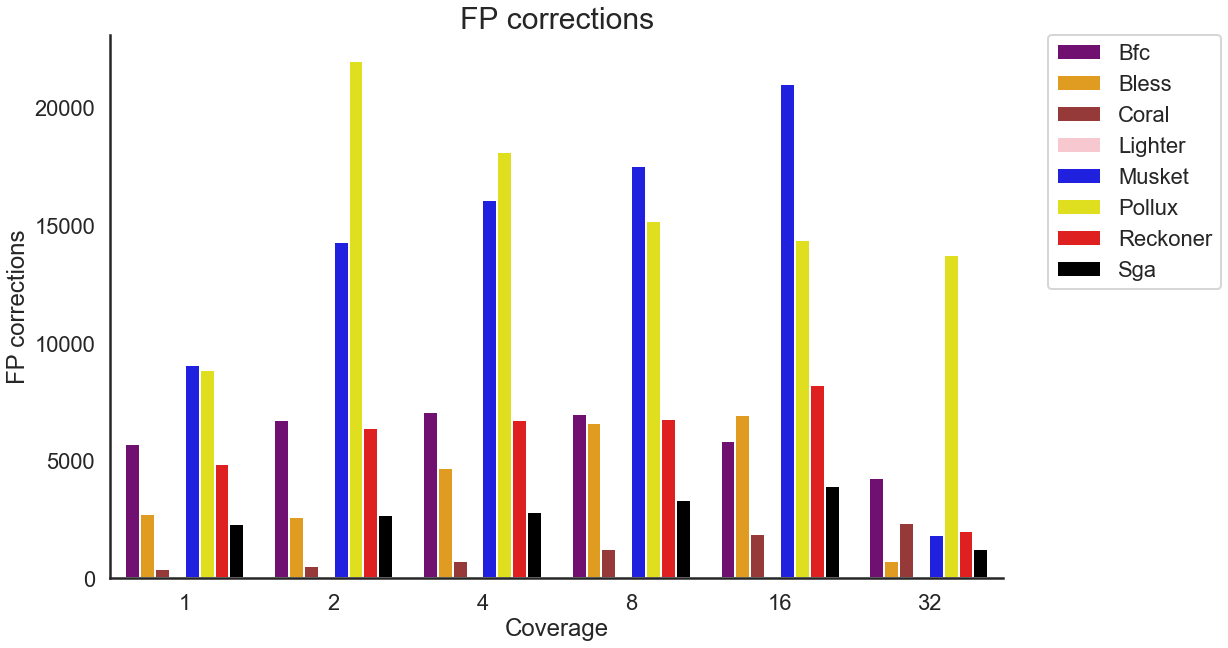

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Coverage", 
              y="Base - FP",
              data = data_best,
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Coverage', ylabel='FP corrections')
plt.title("FP corrections", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D1_WGS_human/FigS6c_WGS_human_FP_corrections_cov.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS6c_WGS_human_FP_corrections_cov.pdf", bbox_inches='tight')

<br>
<br>

## Figure S7
The portion of trimmed bases across various coverages settings.
<br>For each tool, the best k-mer size was selected. 


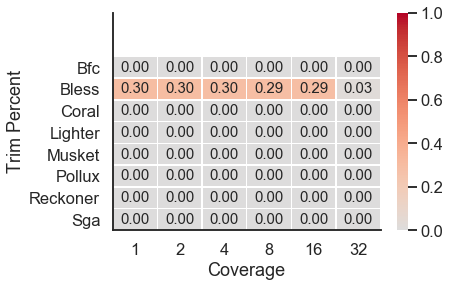

In [77]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Trim Percent')\
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=0, 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Trim Percent')
g.set_ylim(0, 10)
sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS7_heatmap_human_trimpercent.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS7_heatmap_human_trimpercent.pdf",bbox_inches="tight")

<br>
<br>

## Figure S8
The efficiency of trimming across various coverages settings.
<br>For each tool, the best k-mer size was selected.


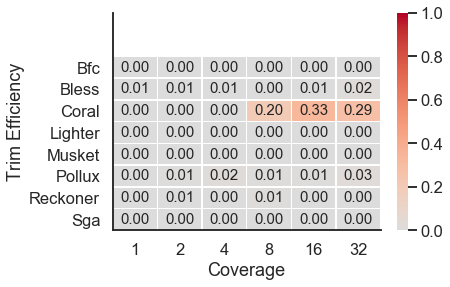

In [78]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Trim Effeciency')\
        .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=0, 
              vmax=1)

g.set(xlabel='Coverage', ylabel='Trim Efficiency')
g.set_ylim(0, 10)
sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS8_heatmap_humna_trimefficiency.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS8_heatmap_human_trimefficiency.pdf",bbox_inches="tight")

<br>
<br>

## Figure S9a
Trimming Efficiency vs. Trim Proportion for WGS human data for coverage 1x.
<br>For each tool, the best k-mer size was selected.


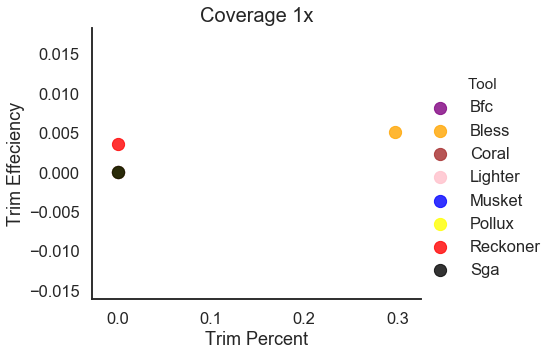

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 1)],
             x='Trim Percent', 
             y='Trim Effeciency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
plt.title("Coverage 1x", fontsize=20)
sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig9a_Precision_vs_Sensitivity_cov1.png")
plt.savefig("../figures/D1_WGS_human/Fig9a_Precision_vs_Sensitivity_cov1.pdf")

<br>
<br>

## Figure S9b
Trimming Efficiency vs. Trim Proportion for WGS human data for coverage 2x.
<br>For each tool, the best k-mer size was selected.


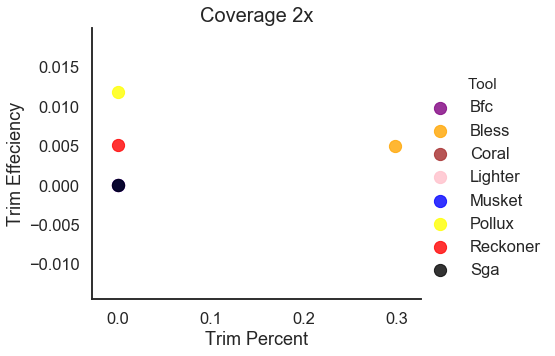

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 2)],
             x='Trim Percent', 
             y='Trim Effeciency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
plt.title("Coverage 2x", fontsize=20)
sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig9b_Precision_vs_Sensitivity_cov2.png")
plt.savefig("../figures/D1_WGS_human/Fig9b_Precision_vs_Sensitivity_cov2.pdf")

<br>
<br>

## Figure S9c
Trimming Efficiency vs. Trim Proportion for WGS human data for coverage 4x.
<br>For each tool, the best k-mer size was selected.


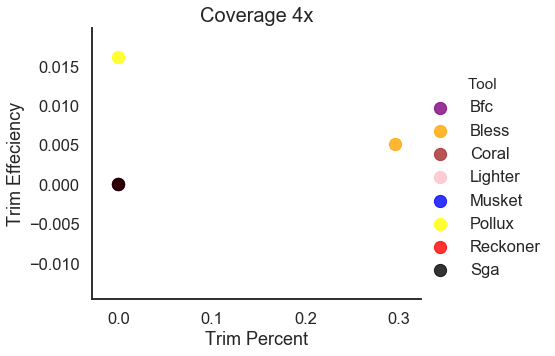

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 4)],
             x='Trim Percent', 
             y='Trim Effeciency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
plt.title("Coverage 4x", fontsize=20)
sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig9c_Precision_vs_Sensitivity_cov4.png")
plt.savefig("../figures/D1_WGS_human/Fig9c_Precision_vs_Sensitivity_cov4.pdf")

<br>
<br>

## Figure S9d
Trimming Efficiency vs. Trim Proportion for WGS human data for coverage 8x.
<br>For each tool, the best k-mer size was selected.


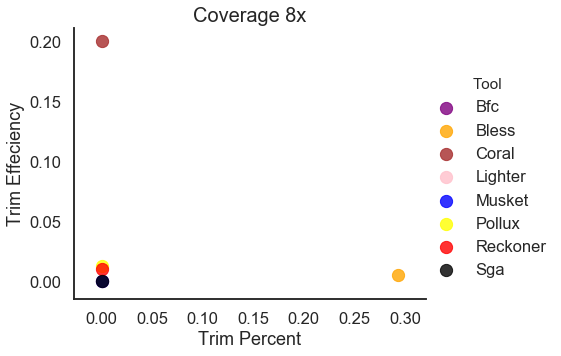

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 8)],
             x='Trim Percent', 
             y='Trim Effeciency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
plt.title("Coverage 8x", fontsize=20)
sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig9d_Precision_vs_Sensitivity_cov8.png")
plt.savefig("../figures/D1_WGS_human/Fig9d_Precision_vs_Sensitivity_cov8.pdf")

<br>
<br>

## Figure S9e
Trimming Efficiency vs. Trim Proportion for WGS human data for coverage 16x.
<br>For each tool, the best k-mer size was selected.


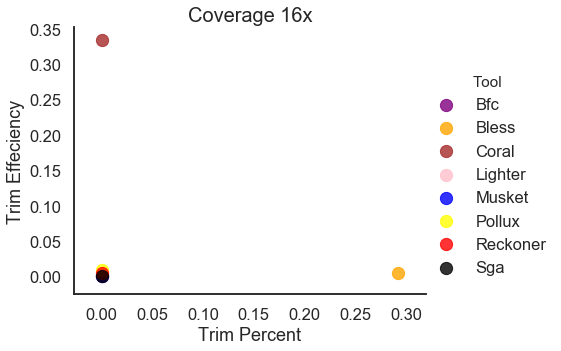

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 16)],
             x='Trim Percent', 
             y='Trim Effeciency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
plt.title("Coverage 16x", fontsize=20)
sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig9e_Precision_vs_Sensitivity_cov16.png")
plt.savefig("../figures/D1_WGS_human/Fig9e_Precision_vs_Sensitivity_cov16.pdf")

<br>
<br>

## Figure S9f
Trimming Efficiency vs. Trim Proportion for WGS human data for coverage 32x.
<br>For each tool, the best k-mer size was selected.


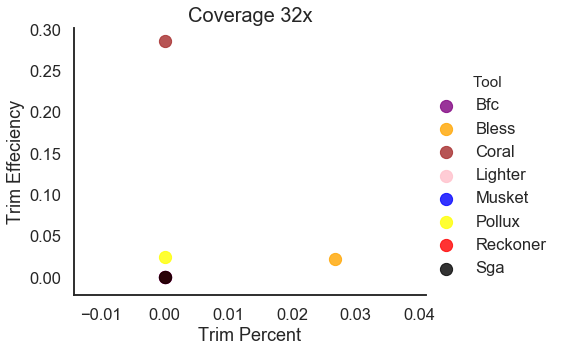

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)],
             x='Trim Percent', 
             y='Trim Effeciency', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
plt.title("Coverage 32x", fontsize=20)
sns.despine()

plt.savefig("../figures/D1_WGS_human/Fig9f_Precision_vs_Sensitivity_cov32.png")
plt.savefig("../figures/D1_WGS_human/Fig9f_Precision_vs_Sensitivity_cov32.pdf")

<br>
<br>

## Figure S10a
Heatmap depicting the gain for low complexity regions (‘low’) and the rest of the genome (‘normal’) 
for WGS human data with 16x coverage.
<br>For each tool, the best k-mer size was selected.


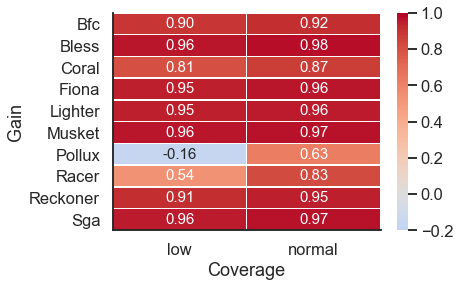

In [85]:
result = data_comp_best[(data_comp_best['Coverage'] == 16)]\
        .pivot(index='Tool', columns='Complexity', values='Base Gain')\
        .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result,
              annot=True,
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-0.2,
              vmax=1)

g.set(xlabel='Coverage', ylabel='Gain')
g.set_ylim(0, 10)
sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_16.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_16.pdf",bbox_inches="tight")

<br>
<br>

## Figure S10b
Heatmap depicting the gain for low complexity regions (‘low’) and the rest of the genome (‘normal’) 
for WGS human data with 32x coverage.
<br>For each tool, the best k-mer size was selected.

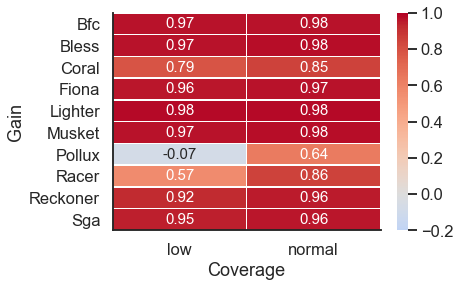

In [86]:
result = data_comp_best[(data_comp_best['Coverage'] == 32)]\
        .pivot(index='Tool', columns='Complexity', values='Base Gain')\
        .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result,
              annot=True,
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-0.2,
              vmax=1)

g.set(xlabel='Coverage', ylabel='Gain')
g.set_ylim(0, 10)
sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_32.png",bbox_inches="tight")
plt.savefig("../figures/D1_WGS_human/FigS10a_gain_complexity_32.pdf",bbox_inches="tight")

<br>
<br>

## Figure S11a
Barplot depicting the CPU time for the datasaet WGS human. 
<br> For each tool, the mean value across different kmer sizes was selected.

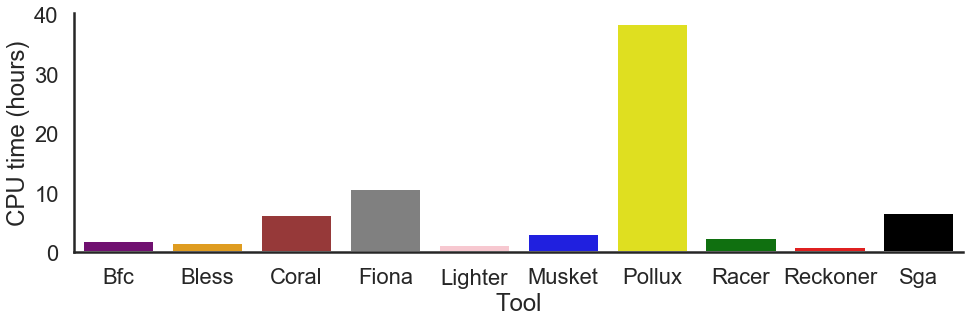

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("poster")

g=sns.catplot(x="Tool", 
              y="Cpu",
              data = data_cpu_ram, 
              palette=color_dict, 
              kind="bar",
              aspect=2.8)

g.set( ylabel='CPU time (hours)')
sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS11a_WGS_human_cpu.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS11a_WGS_human_cpu.pdf", bbox_inches='tight')

<br>
<br>

## Figure S11b
Barplot depicting tthe maximum amount of RAM for the datasaet WGS human. 
<br> For each tool, the mean value across different kmer sizes was selected.

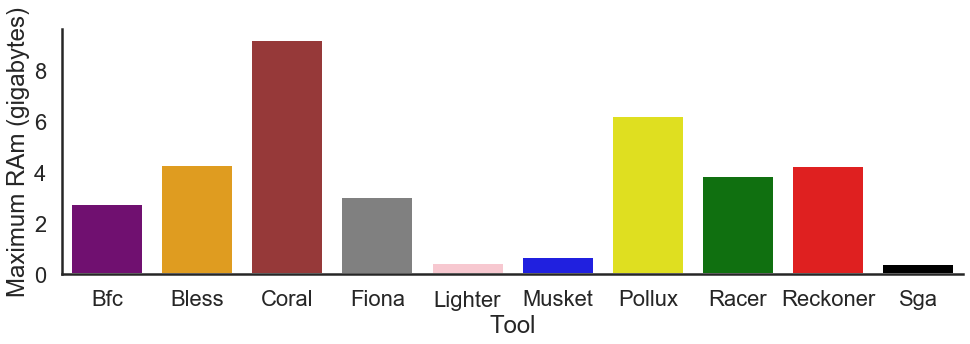

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("poster")

g=sns.catplot(x="Tool", 
              y="Ram",
              data = data_cpu_ram, 
              palette=color_dict, 
              kind="bar",
              aspect=2.8)

g.set( ylabel='Maximum RAm (gigabytes)')
sns.despine()

plt.savefig("../figures/D1_WGS_human/FigS11b_WGS_human_ram.png", bbox_inches='tight')
plt.savefig("../figures/D1_WGS_human/FigS11b_WGS_human_ram.pdf", bbox_inches='tight')